In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# Load wine dataset
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

print("Dataset shape:", df.shape)
print("First 5 rows:")
df.head()


Dataset shape: (178, 14)
First 5 rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
# Check missing values
df.isnull().sum()


,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[df.columns[:-1]] = imputer.fit_transform(df[df.columns[:-1]])


In [4]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train_scaled.shape[0])
print("Testing samples:", X_test_scaled.shape[0])


Training samples: 142
Testing samples: 36


In [6]:
from sklearn.neural_network import MLPClassifier


In [7]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)


In [8]:
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final loss: {mlp.loss_:.4f}")
print(f"Training accuracy: {mlp.score(X_train_scaled, y_train):.4f}")


Training completed in 18 iterations
Final loss: 0.4071
Training accuracy: 0.8732


In [9]:
if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged.")
else:
    print("Model converged successfully.")


Model converged successfully.


In [10]:
y_pred = mlp.predict(X_test_scaled)
y_pred_proba = mlp.predict_proba(X_test_scaled)


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Test Accuracy: 0.7778 (77.78%)


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))



Classification Report:
              precision    recall  f1-score   support

     class_0       0.85      0.92      0.88        12
     class_1       0.71      0.71      0.71        14
     class_2       0.78      0.70      0.74        10

    accuracy                           0.78        36
   macro avg       0.78      0.78      0.78        36
weighted avg       0.78      0.78      0.78        36



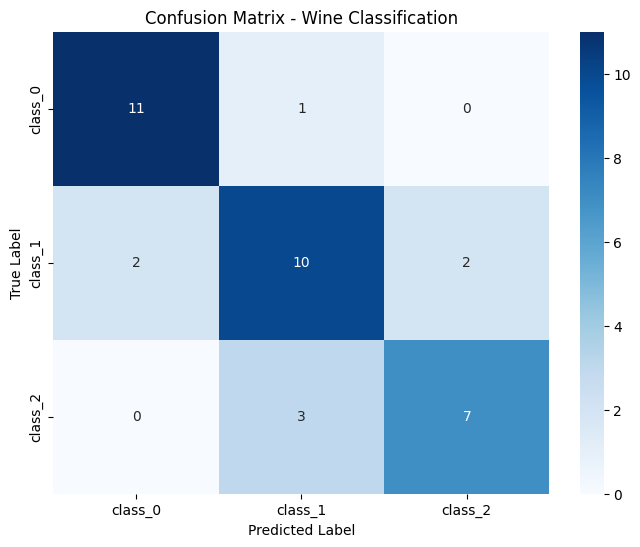

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=wine.target_names,
    yticklabels=wine.target_names
)
plt.title("Confusion Matrix - Wine Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")


Weighted Precision: 0.7759
Weighted Recall: 0.7778
Weighted F1-Score: 0.7758


In [15]:
print("Samples:", wine.data.shape[0])
print("Features:", wine.data.shape[1])

print("Class distribution:")
pd.Series(wine.target).value_counts()

print("Class names:", wine.target_names)


Samples: 178
Features: 13
Class distribution:
Class names: ['class_0' 'class_1' 'class_2']
